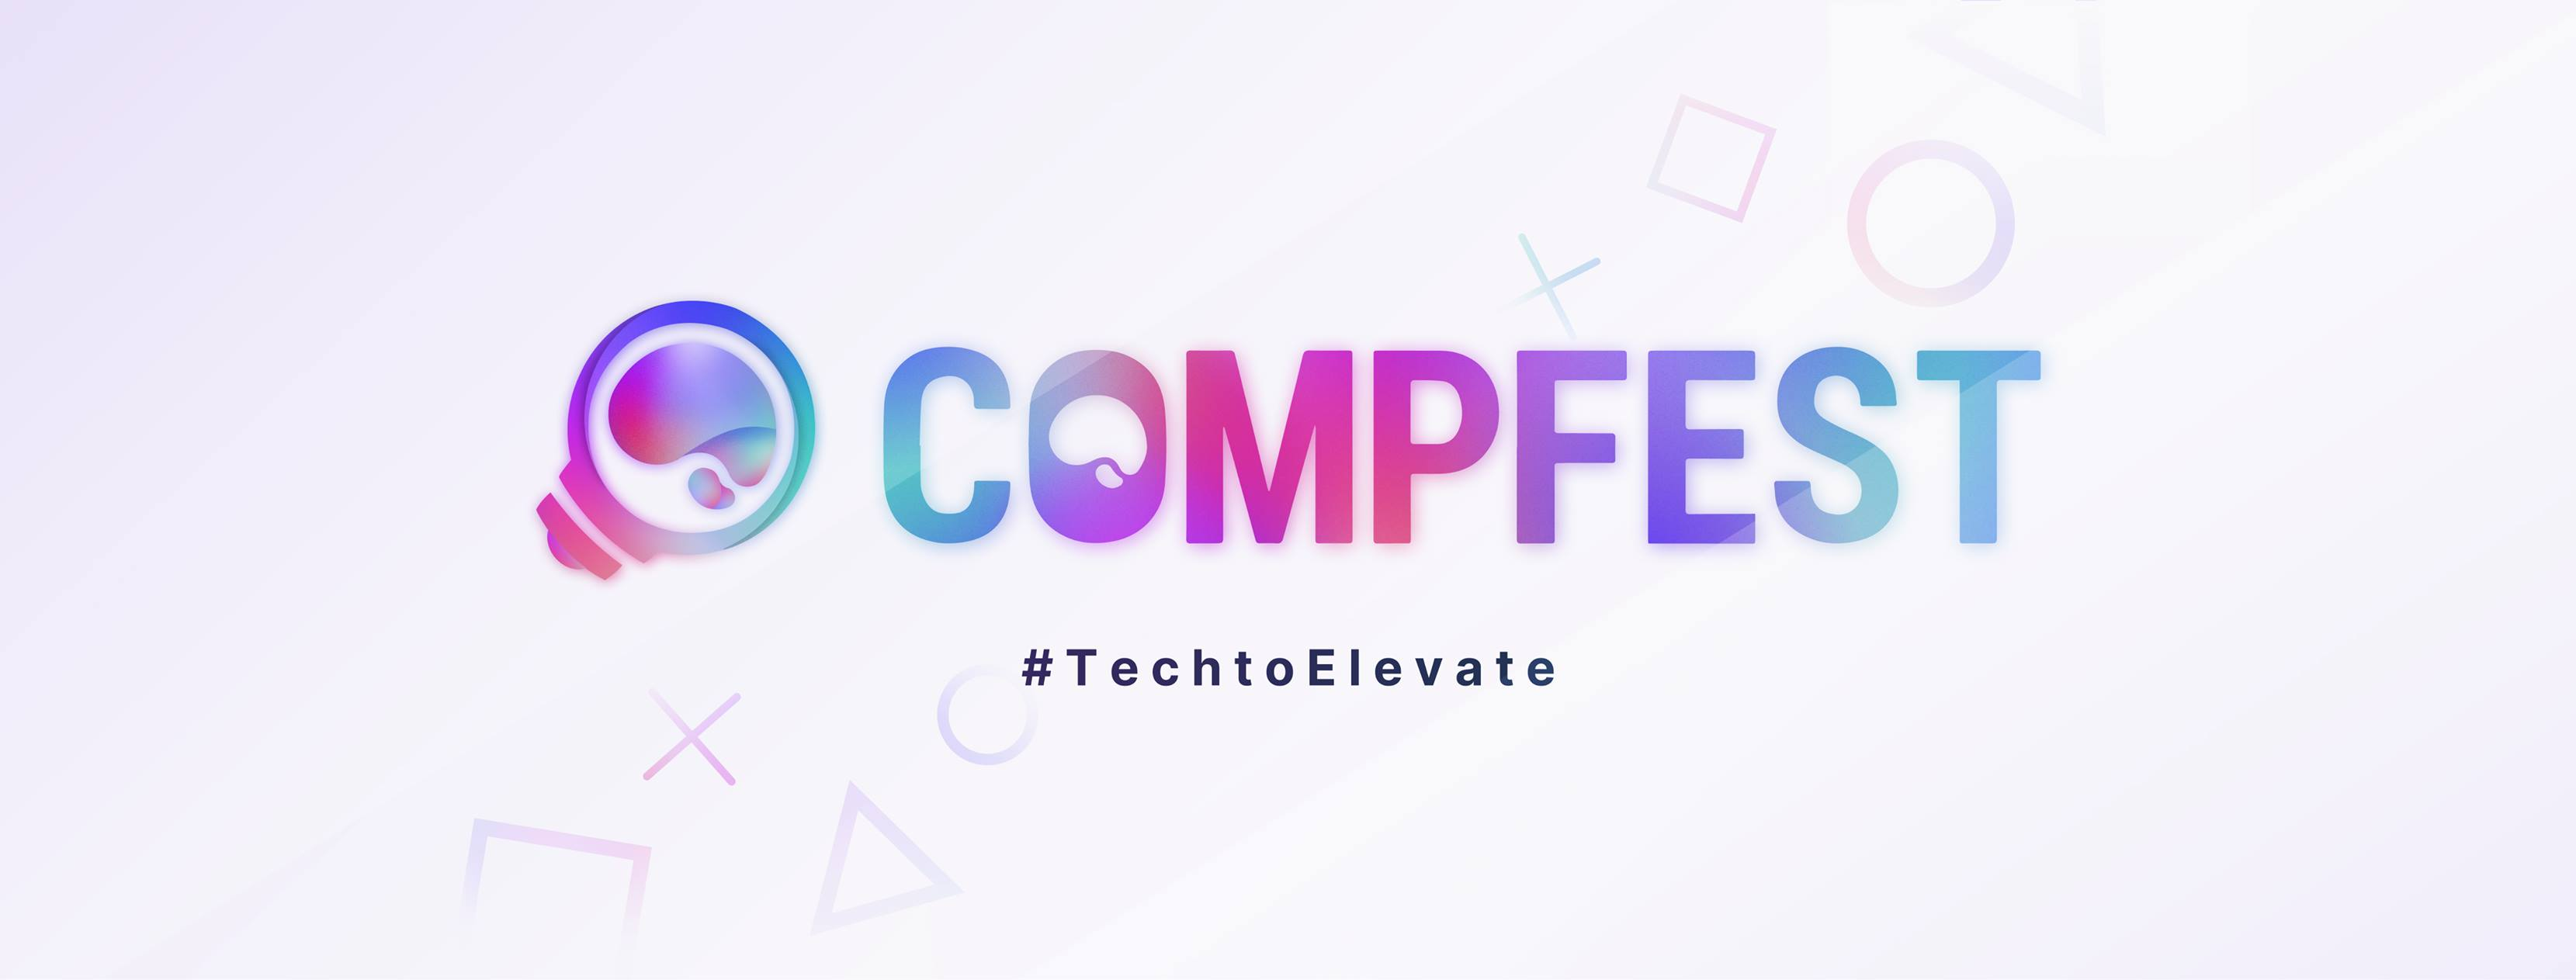

<h1><b>Kode ini dibuat sebagai sarana guna menyelesaikan permasalahan yang menjadi prasyarat untuk mengikuti Compfest 2021 - Data Science Academy</b></h1>

<h2><b>Nama Tim: Sarjana Korona</b></h1>
<h2><b>Anggota:
<ul>
<li>Sebastian Cahyo Ardhi Iswara</li>
<li>Kenneth Angelo</li>
<li>Iga Narenda Pramawijaya</li>
</ul>
</b></h2>

<h2><b>Dataset: <a href="tiny.cc/Datacovidjakarta"></b>dataset</a></h2>

<h2><b>Referensi: <a href="corona.jakarta.go.id"></b>referensi</a></h2>

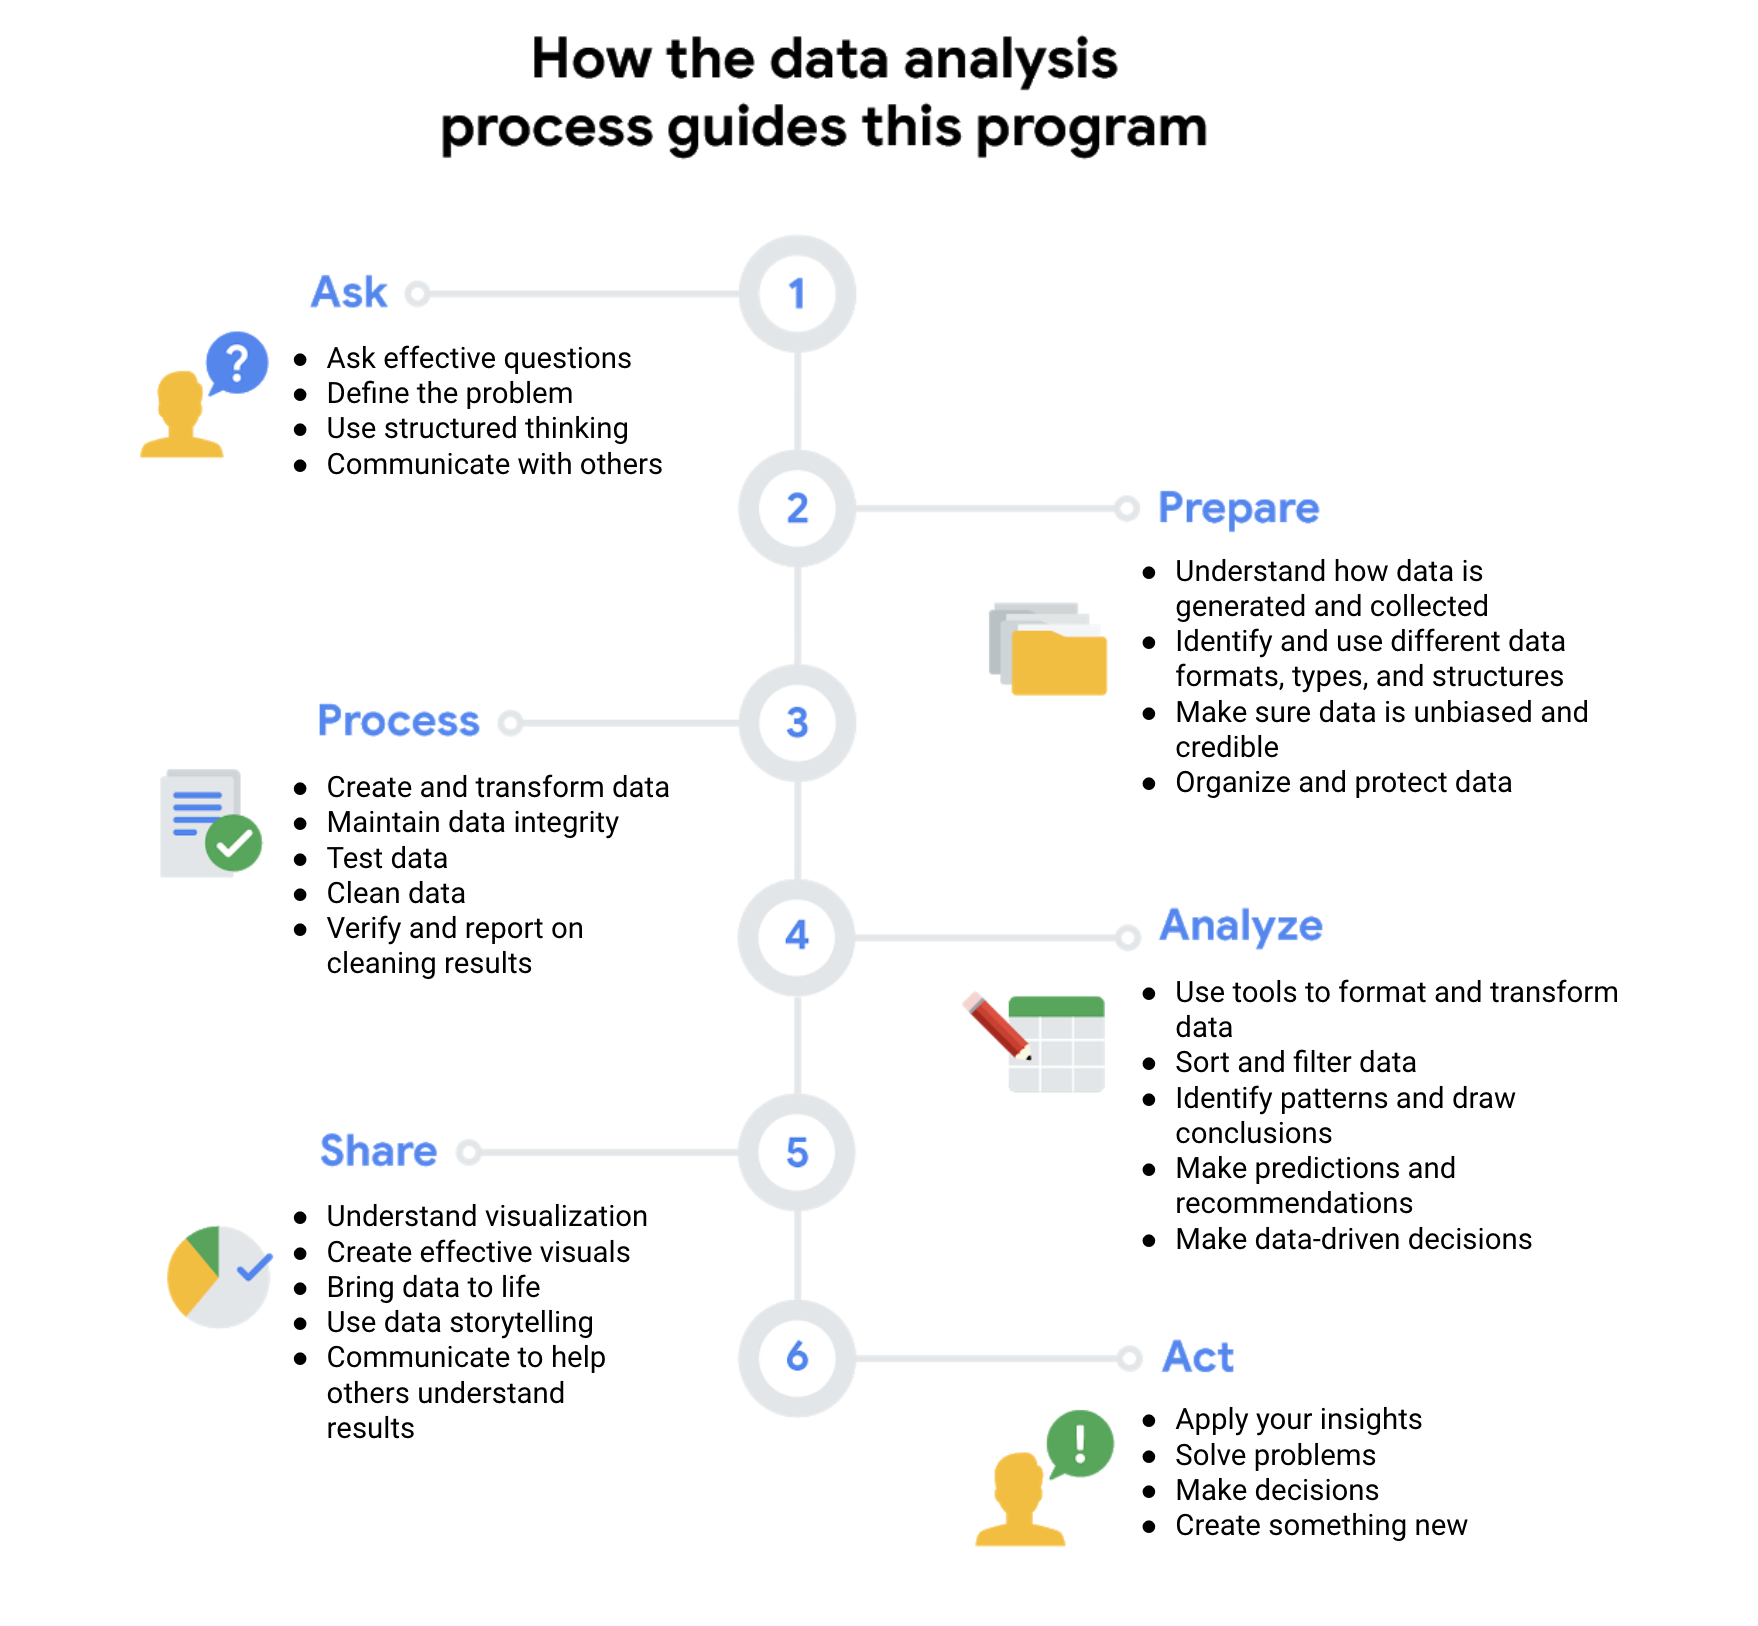

[link text](https://)# **a. Problem Statement**

* Hubungan antara kasus positif harian COVID-19 di jakarta dengan bertambahnya jumlah orang yang melakukan isolasi mandiri.

* perbandingan kasus covid-19 jakarta dengan kota maju dinegara lain

* seberapa signifikan pengaruh kasus covid-19 dijakarta dengan keparahan kasus keseluruhan di Indonesia

* pengaruh vaksinasi dengan penekanan angka kenaikan covid-19 di Indonesia

* pengaruh pandemi covid-19 terhadap mobilitas masyarakat indonesia

# **b. Hypothesis**

* Semakin banyak orang yang didiagnosa positif COVID-19 maka semakin banyak jumlah orang yang melakukan isolasi mandiri.

* Kasus positif aktif di Jakarta bertambah setiap harinya khususnya setelah arus mudik

* Vaksinasi tidak mempengaruhi penekanan angka kenaikan kasus positif Covid-19 di Indonesia

* Angka kenaikan kasus positif Covid-19 melambung tinggi setelah varian delta muncul

# **c. Exploratory Data Analysis**

In [8]:
import pandas as pd

path = "/content/Daily Update Data Agregat Covid-19 Jakarta.xlsx"
df = pd.read_excel(path, sheet_name='Data Jakarta')
df.tail()

,Tanggal,Jam,Tanggal Jam,Total Pasien,Sembuh,Meninggal,Self Isolation,Masih Perawatan,Belum Diketahui (masih verifikasi),Menunggu Hasil,Tenaga Kesehatan Terinfeksi,Positif Harian,Positif Aktif,Sembuh Harian,Tanpa Gejala,Bergejala,Belum Ada Data
501,2021-07-15,8.0,2021-07-15 08:00:00,714601,595582,9743,86298,22978,NaN,NaN,NaN,12691,109276,3026,31922.0,52360.0,24994.0
502,2021-07-16,8.0,2021-07-16 08:00:00,727016,604033,9845,88295,24843,NaN,NaN,NaN,12415,113138,8451,28216.0,48144.0,36778.0
503,2021-07-17,8.0,2021-07-17 08:00:00,737184,615640,9902,87929,23713,NaN,NaN,NaN,10168,111642,11607,23349.0,41735.0,46558.0
504,2021-07-18,8.0,2021-07-18 08:00:00,746312,627481,10103,86457,22271,NaN,NaN,NaN,9128,108728,11841,20890.0,33459.0,54379.0
505,2021-07-19,8.0,2021-07-19 08:00:00,751312,640171,10345,81275,19521,NaN,NaN,NaN,5000,100796,12690,35311.0,51962.0,NaN


## **SOAL AWAL**

### **1. Dari dataset yang disediakan, temukan nilai mean, median, dan modus dari positif COVID-19 harian Jakarta**

In [9]:
import statistics as stat

#mencari nilai mean
mean = df['Positif Harian'].mean()

#mencari nilai median
median = df['Positif Harian'].median()

#mencari nilai modus
modus = stat.mode(df['Positif Harian'].values)

#melakukan output semua nilai
print('HASIL DARI NILAI YANG DICARI')
print(f'Mean\t: {mean}')
print(f'Median\t: {median}')
print(f'Modus\t: {modus}')

HASIL DARI NILAI YANG DICARI
Mean	: 1484.806324110672
Median	: 895.0
Modus	: 0


### **2. Dari dataset yang disediakan, temukan nilai minimal dan maksimal dari positif COVID-19 harian Jakarta.**

In [10]:
#mencari nilai maksimal
max = df['Positif Harian'].max()

#mencari nilai minimal
min = df['Positif Harian'].min()

#melakukan output semua nilai
print('HASIL DARI NILAI YANG DICARI')
print(f'Max\t: {max}')
print(f'Min\t: {min}')

HASIL DARI NILAI YANG DICARI
Max	: 14619
Min	: 0


### **3. Dari dataset yang disediakan, temukan nilai-nilai outlier yang ada (menggunakan variabel yang kalian tentukan).**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


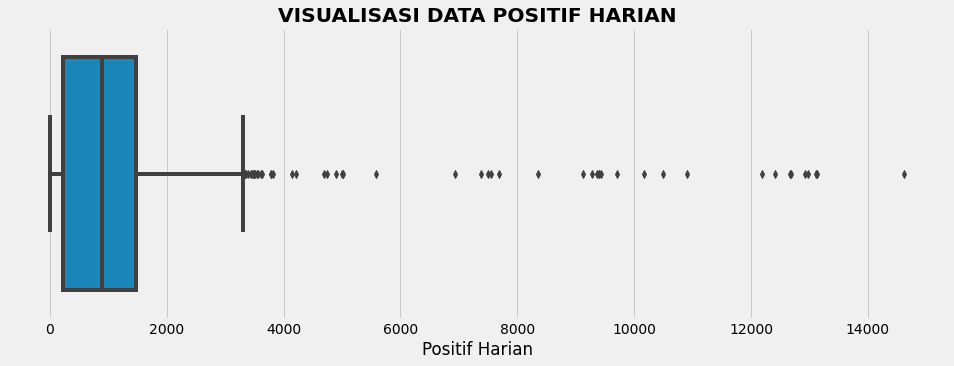

In [11]:
#melakukan visualisasi terhadap data positif harian menggunakan boxplot
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(df['Positif Harian'], ax=ax)
ax.set_title('VISUALISASI DATA POSITIF HARIAN', fontweight='bold')
plt.show()

In [12]:
#mengambil nilai 25% quartil pada data positif harian
Q1 = df['Positif Harian'].quantile(0.25)
Q3 = df['Positif Harian'].quantile(0.75)

IQR = Q3 - Q1
Qmin = Q1 - (1.5 * IQR)
Qmax = Q1 + (1.5 * IQR)

print('HASIL DARI NILAI YANG DICARI')
print(f'Q1\t: {Q1}')
print(f'Q3\t: {Q3}')
print(f'IQR\t: {IQR}')
print(f'Qmin\t: {Qmin}')
print(f'Qmax\t: {Qmax}')

HASIL DARI NILAI YANG DICARI
Q1	: 224.0
Q3	: 1466.0
IQR	: 1242.0
Qmin	: -1639.0
Qmax	: 2087.0


In [13]:
#Melihat data yang dianggap sebagai pencilan
df['Positif Harian'].loc[(df['Positif Harian'] < Qmin) | (df['Positif Harian'] > Qmax)].reset_index()

,index,Positif Harian
0,299,2096
1,311,2402
2,312,2398
3,313,2959
4,314,2753
...,...,...
78,501,12691
79,502,12415
80,503,10168
81,504,9128


### **4. Dari dataset yang disediakan, usulkan dua buah variabel dan berikan analisis korelasi antara kedua variabel tersebut. Jelaskan apa kesimpulan yang dapat diambil berdasarkan analisis kalian.**

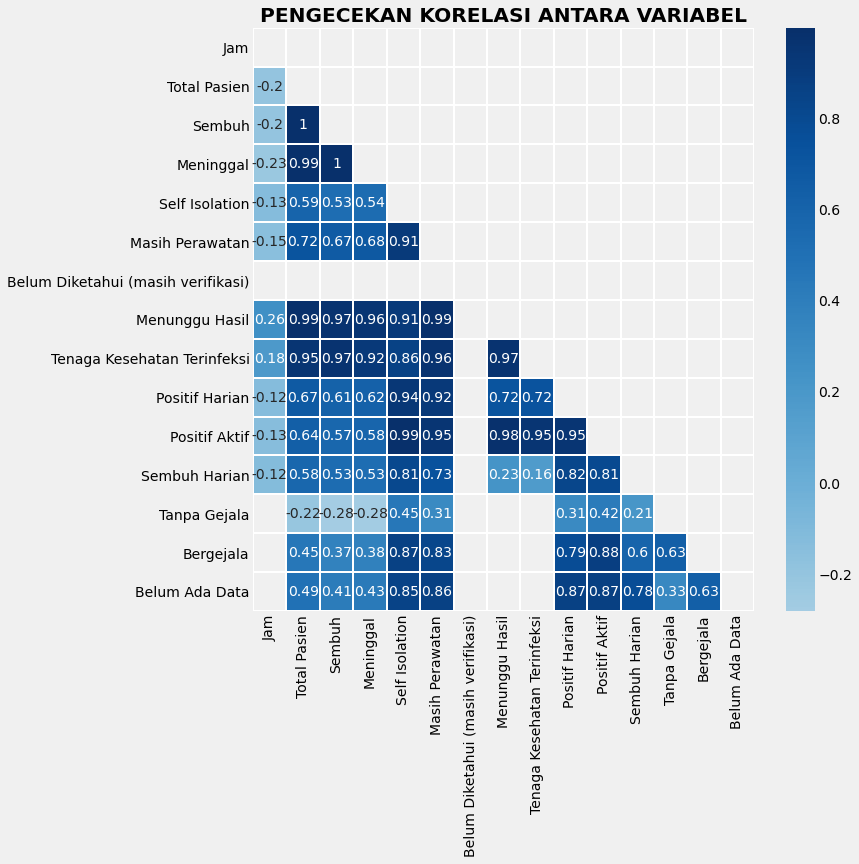

In [14]:
import numpy as np

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask, center=0, linewidth=1, cmap='Blues', annot=True)
ax.set_title('PENGECEKAN KORELASI ANTARA VARIABEL', fontweight='bold')
plt.show()

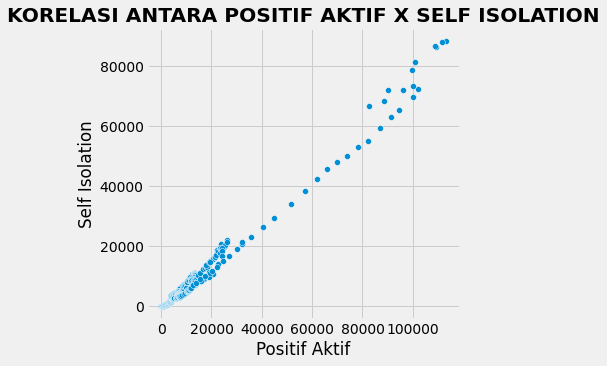

In [15]:
#melakukan pengecekan korelasi antara dua variabel positif aktif dan isoman
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x=df['Positif Aktif'], y=df['Self Isolation'], ax=ax)
ax.set_title('KORELASI ANTARA POSITIF AKTIF X SELF ISOLATION', fontweight='bold')
plt.show()

## **ANALISIS TAMBAHAN**

### **seberapa signifikan pengaruh kasus covid-19 dijakarta dengan keparahan kasus keseluruhan di Indonesia**


In [16]:
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
import pandas as pd

path = "/content/Daily Update Data Agregat Covid-19 Jakarta.xlsx"
df_id = pd.read_excel(path, sheet_name='Data Indonesia dan Jakarta')
df_id.head()

,Tanggal,Meninggal (Indonesia),Sembuh (Indonesia),Dirawat (Indonesia),Positif (Indonesia),Meninggal (Jakarta),Sembuh (Jakarta),Self-Isolation (Jakarta),Dirawat (Jakarta),Positif (Jakarta),Positif Aktif (Jakarta),Meninggal Harian (Indonesia),Sembuh Harian (Indonesia),Dirawat Harian (Indonesia),Positif Harian (Indonesia),Meninggal Harian (Jakarta),Sembuh Harian (Jakarta),Self-Isolation Harian (Jakarta),Dirawat Harian (Jakarta),Positif Harian (Jakarta),Positif Aktif Harian (Jakarta)
0,2020-03-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020-03-02,0,0,2,2,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0
2,2020-03-03,0,0,2,2,1,0,0,2,3,2,0,0,0,0,1,0,0,2,3,2
3,2020-03-04,0,0,2,2,1,0,0,2,3,2,0,0,0,0,0,0,0,0,0,0
4,2020-03-05,0,0,2,2,3,0,0,4,7,4,0,0,0,0,2,0,0,2,4,2


In [ ]:
dll = df_id['Positif (Indonesia)'].max() - df_id['Positif (Jakarta)'].max()
df_tot = pd.DataFrame({'Jumlah': [dll,df_id['Positif (Jakarta)'].max()]},
                      index=['Positif (diluar Jakarta)','Positif (Jakarta)'])


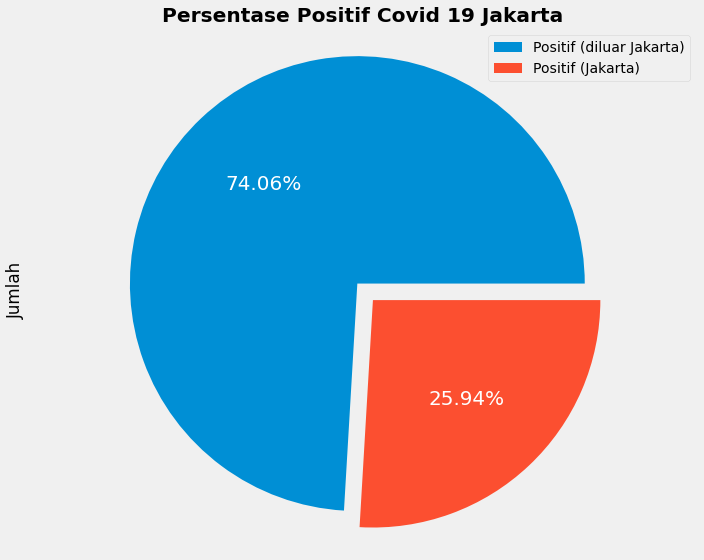

In [ ]:
import matplotlib.pyplot as plt
plot = df_tot.plot.pie(y='Jumlah',autopct='%.2f%%', figsize=(10, 8),textprops={'fontsize': 20, 'color': 'white'},labeldistance=None,explode=(0.1, 0))
plt.title('Persentase Positif Covid 19 Jakarta',fontweight='bold')
plt.legend(['Positif (diluar Jakarta)', 'Positif (Jakarta)'])
plt.axis('equal')
plt.tight_layout()
plt.show()


### **pengaruh vaksinasi dengan penekanan angka kenaikan covid-19 di DKI Jakarta**

In [ ]:
#pcik vaccine data from jakarta
path = "/content/Daily Update Data Agregat Covid-19 Jakarta.xlsx"
vaksin = pd.read_excel(path, sheet_name='Vaksinasi', skiprows=3)
vaksin = vaksin[['Unnamed: 0', 'Unnamed: 18']]
vaksin.rename(columns={'Unnamed: 0': 'Tanggal',  'Unnamed: 18': 'Vaksin 2'}, inplace=True)
vaksin.drop(0, axis=0, inplace=True)
vaksin.head()

,Tanggal,Vaksin 2
1,2021-03-05,91078
2,2021-03-06,91379
3,2021-03-07,93974
4,2021-03-08,96978
5,2021-03-09,119854


In [ ]:
vaksin = vaksin[:-1]

In [ ]:
positifVaksin = df.loc[df['Tanggal'] >= '2021-03-05'].reset_index()

In [ ]:
cekcorr = pd.DataFrame()
cekcorr['Vaksin 2'] = vaksin['Vaksin 2'].copy()
cekcorr['Vaksin 2'] = cekcorr['Vaksin 2'].astype(int)
cekcorr['Positif Harian'] = df['Positif Harian'].copy()
cekcorr.corr()

,Vaksin 2,Positif Harian
Vaksin 2,1.000000,0.654995
Positif Harian,0.654995,1.000000


# **d. Initial Findings**

- sampai tanggal 17 juli 2021 jumlah positif harian maksimal jakarta mencapai 14619 kasus dengan rata-rata positif harian 1445 kasus
- jakarta menyumbang 1/4 dari total keseluruhan kasus positif Covid-19 di Indonesia
- vaksinasi tidak serta-merta menurunkan angka kenaikan positif Covid-19 ,vaksin hanya sebagai alat untuk meningkatkan imunitas tubuh. Penekanan angka kenaikan positif Covid-19 tetap perlu menjalankan prosedur kesehatan yang tepat.
- berikut hasil analisis hari libur nasional dengan angka kenaikan positif Covid-19 terkait prosedur kesehatan

### **pengaruh pandemi covid-19 terhadap mobilitas masyarakat jakarta**

# **e. Deep Dive Analysis**

In [84]:
df_reg2020 = pd.read_csv('/content/2020_ID_Region_Mobility_Report.csv')
df_reg2020 = df_reg2020.loc[df_reg2020['sub_region_1'] == 'Jakarta']

In [85]:
df_reg2021 = pd.read_csv('/content/2021_ID_Region_Mobility_Report.csv')
df_reg2021 = df_reg2021.loc[df_reg2021['sub_region_1'] == 'Jakarta']

In [86]:
df_reg2020['date'] = pd.to_datetime(df_reg2020['date'])
df_reg2021['date'] = pd.to_datetime(df_reg2021['date'])

In [87]:
mobility = pd.concat([df_reg2020, df_reg2021], ignore_index=True)
mobility

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-02-15,2.0,3.0,16.0,5.0,6,0
1,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-02-16,-10.0,-10.0,-15.0,-3.0,2,2
2,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-02-17,-2.0,-1.0,-6.0,2.0,4,1
3,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-02-18,-1.0,1.0,-3.0,3.0,3,1
4,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2020-02-19,-1.0,-3.0,-2.0,3.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2021-07-11,-51.0,-14.0,-72.0,-55.0,-29,17
513,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2021-07-12,-43.0,-8.0,-56.0,-60.0,-51,21
514,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2021-07-13,-46.0,-12.0,-59.0,-60.0,-53,22
515,ID,Indonesia,Jakarta,NaN,NaN,ID-JK,NaN,ChIJnUvjRenzaS4RILjULejFAAE,2021-07-14,-45.0,-12.0,-59.0,-60.0,-51,22


In [ ]:
start_date = "2020-4-1"
end_date = "2020-7-6"

after_start_date = df_reg2020["date"] >= start_date
before_end_date = df_reg2020["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates2020 = df_reg2020.loc[between_two_dates]

print(filtered_dates2020)

start_date = "2021-4-1"
end_date = "2021-7-6"

after_start_date = df_reg2021["date"] >= start_date
before_end_date = df_reg2021["date"] <= end_date
between_two_dates = after_start_date & before_end_date
filtered_dates2021 = df_reg2021.loc[between_two_dates]

print(filtered_dates2021)

      country_region_code  ... residential_percent_change_from_baseline
46                     ID  ...                                       15
47                     ID  ...                                       16
48                     ID  ...                                       17
49                     ID  ...                                       15
50                     ID  ...                                       14
...                   ...  ...                                      ...
11052                  ID  ...                                        7
11053                  ID  ...                                        9
11054                  ID  ...                                        7
11055                  ID  ...                                        3
11056                  ID  ...                                        7

[3395 rows x 15 columns]
     country_region_code  ... residential_percent_change_from_baseline
90                    ID  ...          

In [ ]:
df_mob_jak_2020 = filtered_dates2020.loc[filtered_dates2020['sub_region_1'] == 'Jakarta']
df_mob_jak_2021 = filtered_dates2021.loc[filtered_dates2021['sub_region_1'] == 'Jakarta']

In [ ]:
df_mob_jak_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 4219 to 4315
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 97 non-null     object        
 1   country_region                                      97 non-null     object        
 2   sub_region_1                                        97 non-null     object        
 3   sub_region_2                                        0 non-null      float64       
 4   metro_area                                          0 non-null      float64       
 5   iso_3166_2_code                                     97 non-null     object        
 6   census_fips_code                                    0 non-null      float64       
 7   place_id                                            97 non-null     object        
 8   date   

In [ ]:
df_mob_jak_2020.set_index(df_mob_jak_2020['date'],drop=True,inplace=True)
df_mob_jak_2021.set_index(df_mob_jak_2021['date'],drop=True,inplace=True)

In [ ]:
df_mob_jak_2020=df_mob_jak_2020.resample('D').interpolate()[::7]
df_mob_jak_2021=df_mob_jak_2021.resample('D').interpolate()[::7]

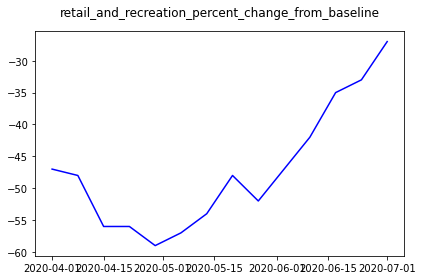

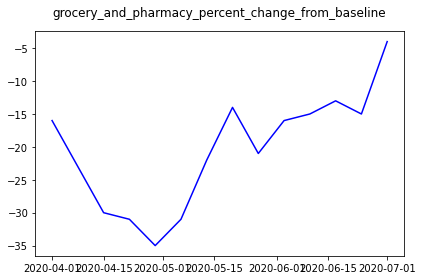

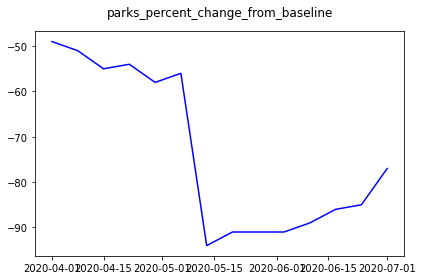

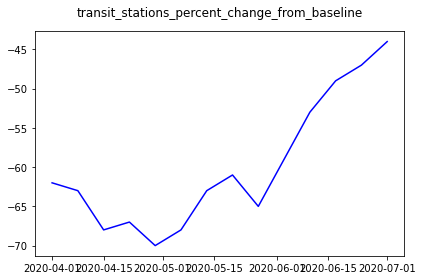

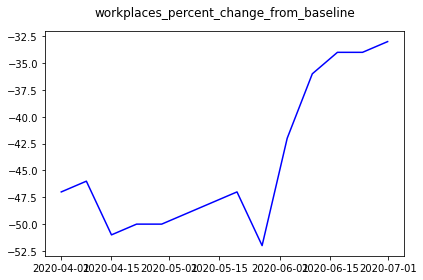

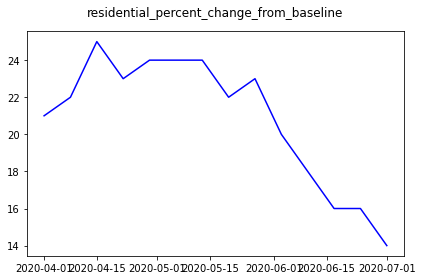

In [ ]:
for col in ['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']:
  plt.plot(df_mob_jak_2020['date'],df_mob_jak_2020[col],c='b', label='2020')
  plt.title(col, pad=15)
  plt.tight_layout()
  plt.show()

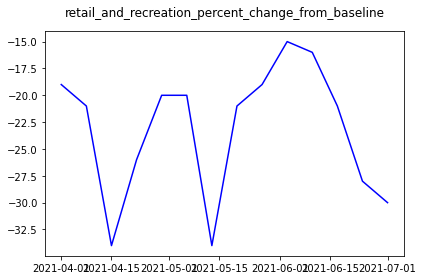

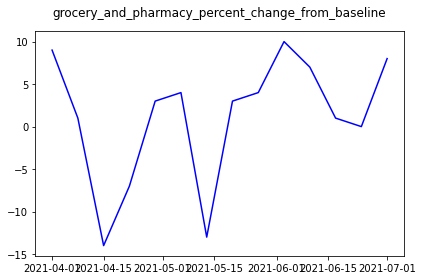

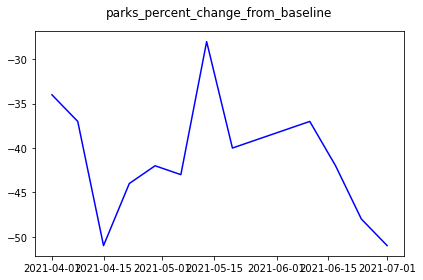

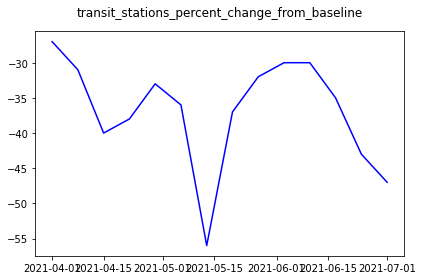

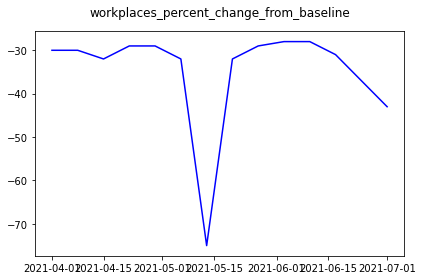

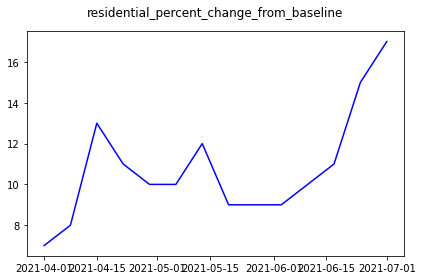

In [ ]:
for col in ['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']:
  plt.plot(df_mob_jak_2021['date'],df_mob_jak_2021[col],c='b', label='2021')
  plt.title(col, pad=15)
  plt.tight_layout()
  plt.show()

In [19]:
import json
import pandas as pd

fileJson = '/content/libur2020.json'
fileJson2 = '/content/libur2021.json'

def preprocessCalendar(fileJson):
  date = []
  name = []

  with open(fileJson) as f:
    data = json.load(f)
  
  for month in data['data']['holiday']:
    month = str(month)
  
    if data['data']['holiday'][month]['count'] != 0:
      for d in data['data']['holiday'][month]['data']:      

        date.append(d['date'])
        name.append(d['name'])
    
  #create dataframe
  calonDF = {'Date': date,
              'Name': name}
  
  df = pd.DataFrame(calonDF)
  print(df)
  
  return df

In [69]:
from datetime import timedelta
pascaLibur = dfLibur.copy()
pascaLibur['Name'] = pascaLibur['Name'].apply(lambda name : f'Pasca {name}' )
pascaLibur['Date'] = pascaLibur['Date'].apply(lambda libur: libur + timedelta(days=14))

In [101]:
df20 = preprocessCalendar(fileJson)
df21 = preprocessCalendar(fileJson2)

dfLibur = df20.append(df21, ignore_index=True)

#convert Date into datetime
dfLibur['Date'] = pd.to_datetime(dfLibur['Date'])

          Date                               Name
0   2020-01-01                  Tahun Baru Masehi
1   2020-01-25                   Tahun Baru Imlek
2   2020-03-22     Isra' Mi'raj Nabi Muhammad SAW
3   2020-03-25  Hari Raya Nyepi (Tahun Baru Saka)
4   2020-04-10                Wafat Yesus Kristus
5   2020-05-01                 Hari Buruh Sedunia
6   2020-05-07                   Hari Raya Waisak
7   2020-05-21             Kenaikan Yesus Kristus
8   2020-05-24               Hari Raya Idul Fitri
9   2020-05-25               Hari Raya Idul Fitri
10  2020-06-01               Hari Lahir Pancasila
11  2020-07-31                Hari Raya Idul Adha
12  2020-08-17     Hari Proklamasi Kemerdekaan RI
13  2020-08-20                Tahun Baru Hijriyah
14  2020-10-29           Maulid Nabi Muhammad SAW
15  2020-12-25                    Hari Raya Natal
          Date                               Name
0   2021-01-01                  Tahun Baru Masehi
1   2021-02-12                   Tahun Baru Imlek


In [102]:
dfLibur['dummy'] = dfLibur['Date'].apply(lambda x: 40)

In [77]:
pascaLibur['dummy'] = pascaLibur['Date'].apply(lambda x: 14000)
pascaLibur = pascaLibur.loc[(pascaLibur['Date'] <= "2021-07-19") & (pascaLibur['Date'] >= "2020-03-01")]

In [57]:
df['Tanggal'].head(1).values

array(['2020-03-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [73]:
dataku = {
    # 'Tanggal': ["16/3/2020", "10/4/2020", "6/6/2020", "14/9/2020", "12/10/2020", "11/1/2021", "3/7/2021"],
    'Tanggal': ["3/16/2020", "4/10/2020", "6/6/2020", "9/14/2020", "10/12/2020", "1/11/2021", "7/3/2021"],
    'Nama': ["Tutup sekolah", "PSBB", "PSBB Transisi", "PSBB", "PSBB Transisi", "PPKM", "PPKM Darurat"]
}

pembatasan = pd.DataFrame(dataku)
pembatasan['Tanggal'] = pd.to_datetime(pembatasan['Tanggal'])
pembatasan

,Tanggal,Nama
0,2020-03-16,Tutup sekolah
1,2020-04-10,PSBB
2,2020-06-06,PSBB Transisi
3,2020-09-14,PSBB
4,2020-10-12,PSBB Transisi
5,2021-01-11,PPKM
6,2021-07-03,PPKM Darurat


In [74]:
pascaPembatasan = pembatasan.copy()
pascaPembatasan['Nama'] = pascaPembatasan['Nama'].apply(lambda name : f'Pasca {name}' )
pascaPembatasan['Tanggal'] = pascaPembatasan['Tanggal'].apply(lambda libur: libur + timedelta(days=14))
pascaPembatasan

,Tanggal,Nama
0,2020-03-30,Pasca Tutup sekolah
1,2020-04-24,Pasca PSBB
2,2020-06-20,Pasca PSBB Transisi
3,2020-09-28,Pasca PSBB
4,2020-10-26,Pasca PSBB Transisi
5,2021-01-25,Pasca PPKM
6,2021-07-17,Pasca PPKM Darurat


In [83]:
dfLibur


,Date,Name
0,2020-01-01,Tahun Baru Masehi
1,2020-01-25,Tahun Baru Imlek
2,2020-03-22,Isra' Mi'raj Nabi Muhammad SAW
3,2020-03-25,Hari Raya Nyepi (Tahun Baru Saka)
4,2020-04-10,Wafat Yesus Kristus
5,2020-05-01,Hari Buruh Sedunia
6,2020-05-07,Hari Raya Waisak
7,2020-05-21,Kenaikan Yesus Kristus
8,2020-05-24,Hari Raya Idul Fitri
9,2020-05-25,Hari Raya Idul Fitri


In [88]:
mobility.columns

Index(['country_region_code', 'country_region', 'sub_region_1', 'sub_region_2',
       'metro_area', 'iso_3166_2_code', 'census_fips_code', 'place_id', 'date',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [90]:
mobility.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'Retail & Rekreasi',
                         'metro_area': 'Area Perkotaan',
                         'grocery_and_pharmacy_percent_change_from_baseline': 'Grocery: Toko Bahan Pangan & Farmasi',
                         'parks_percent_change_from_baseline': 'Taman',
                         'transit_stations_percent_change_from_baseline': 'Stasiun Transit',
                         'workplaces_percent_change_from_baseline': "Perkantoran",
                         'residential_percent_change_from_baseline': 'Area Perumahan'}, inplace=True)

In [94]:
mobility.fillna(0, inplace=True)

In [96]:
mobility = mobility[['Area Perkotaan','date', 'Retail & Rekreasi', 'Grocery: Toko Bahan Pangan & Farmasi',
       'Taman', 'Stasiun Transit', 'Perkantoran', 'Area Perumahan']]

In [111]:
mobility.head()

,Area Perkotaan,date,Retail & Rekreasi,Grocery: Toko Bahan Pangan & Farmasi,Taman,Stasiun Transit,Perkantoran,Area Perumahan
0,0.0,2020-02-15,2.0,3.0,16.0,5.0,6,0
1,0.0,2020-02-16,-10.0,-10.0,-15.0,-3.0,2,2
2,0.0,2020-02-17,-2.0,-1.0,-6.0,2.0,4,1
3,0.0,2020-02-18,-1.0,1.0,-3.0,3.0,3,1
4,0.0,2020-02-19,-1.0,-3.0,-2.0,3.0,3,1


In [113]:
pascaPembatasan['dummy'] = pascaPembatasan['Tanggal'].apply(lambda x: 14000)
pembatasan = pembatasan.loc[(pembatasan['Tanggal'] <= "2021-07-15") & (pembatasan['Tanggal'] >= "2020-02-15")]
dfLibur = dfLibur.loc[(dfLibur['Date'] <= "2021-07-15") & (dfLibur['Date'] >= "2020-02-15")]

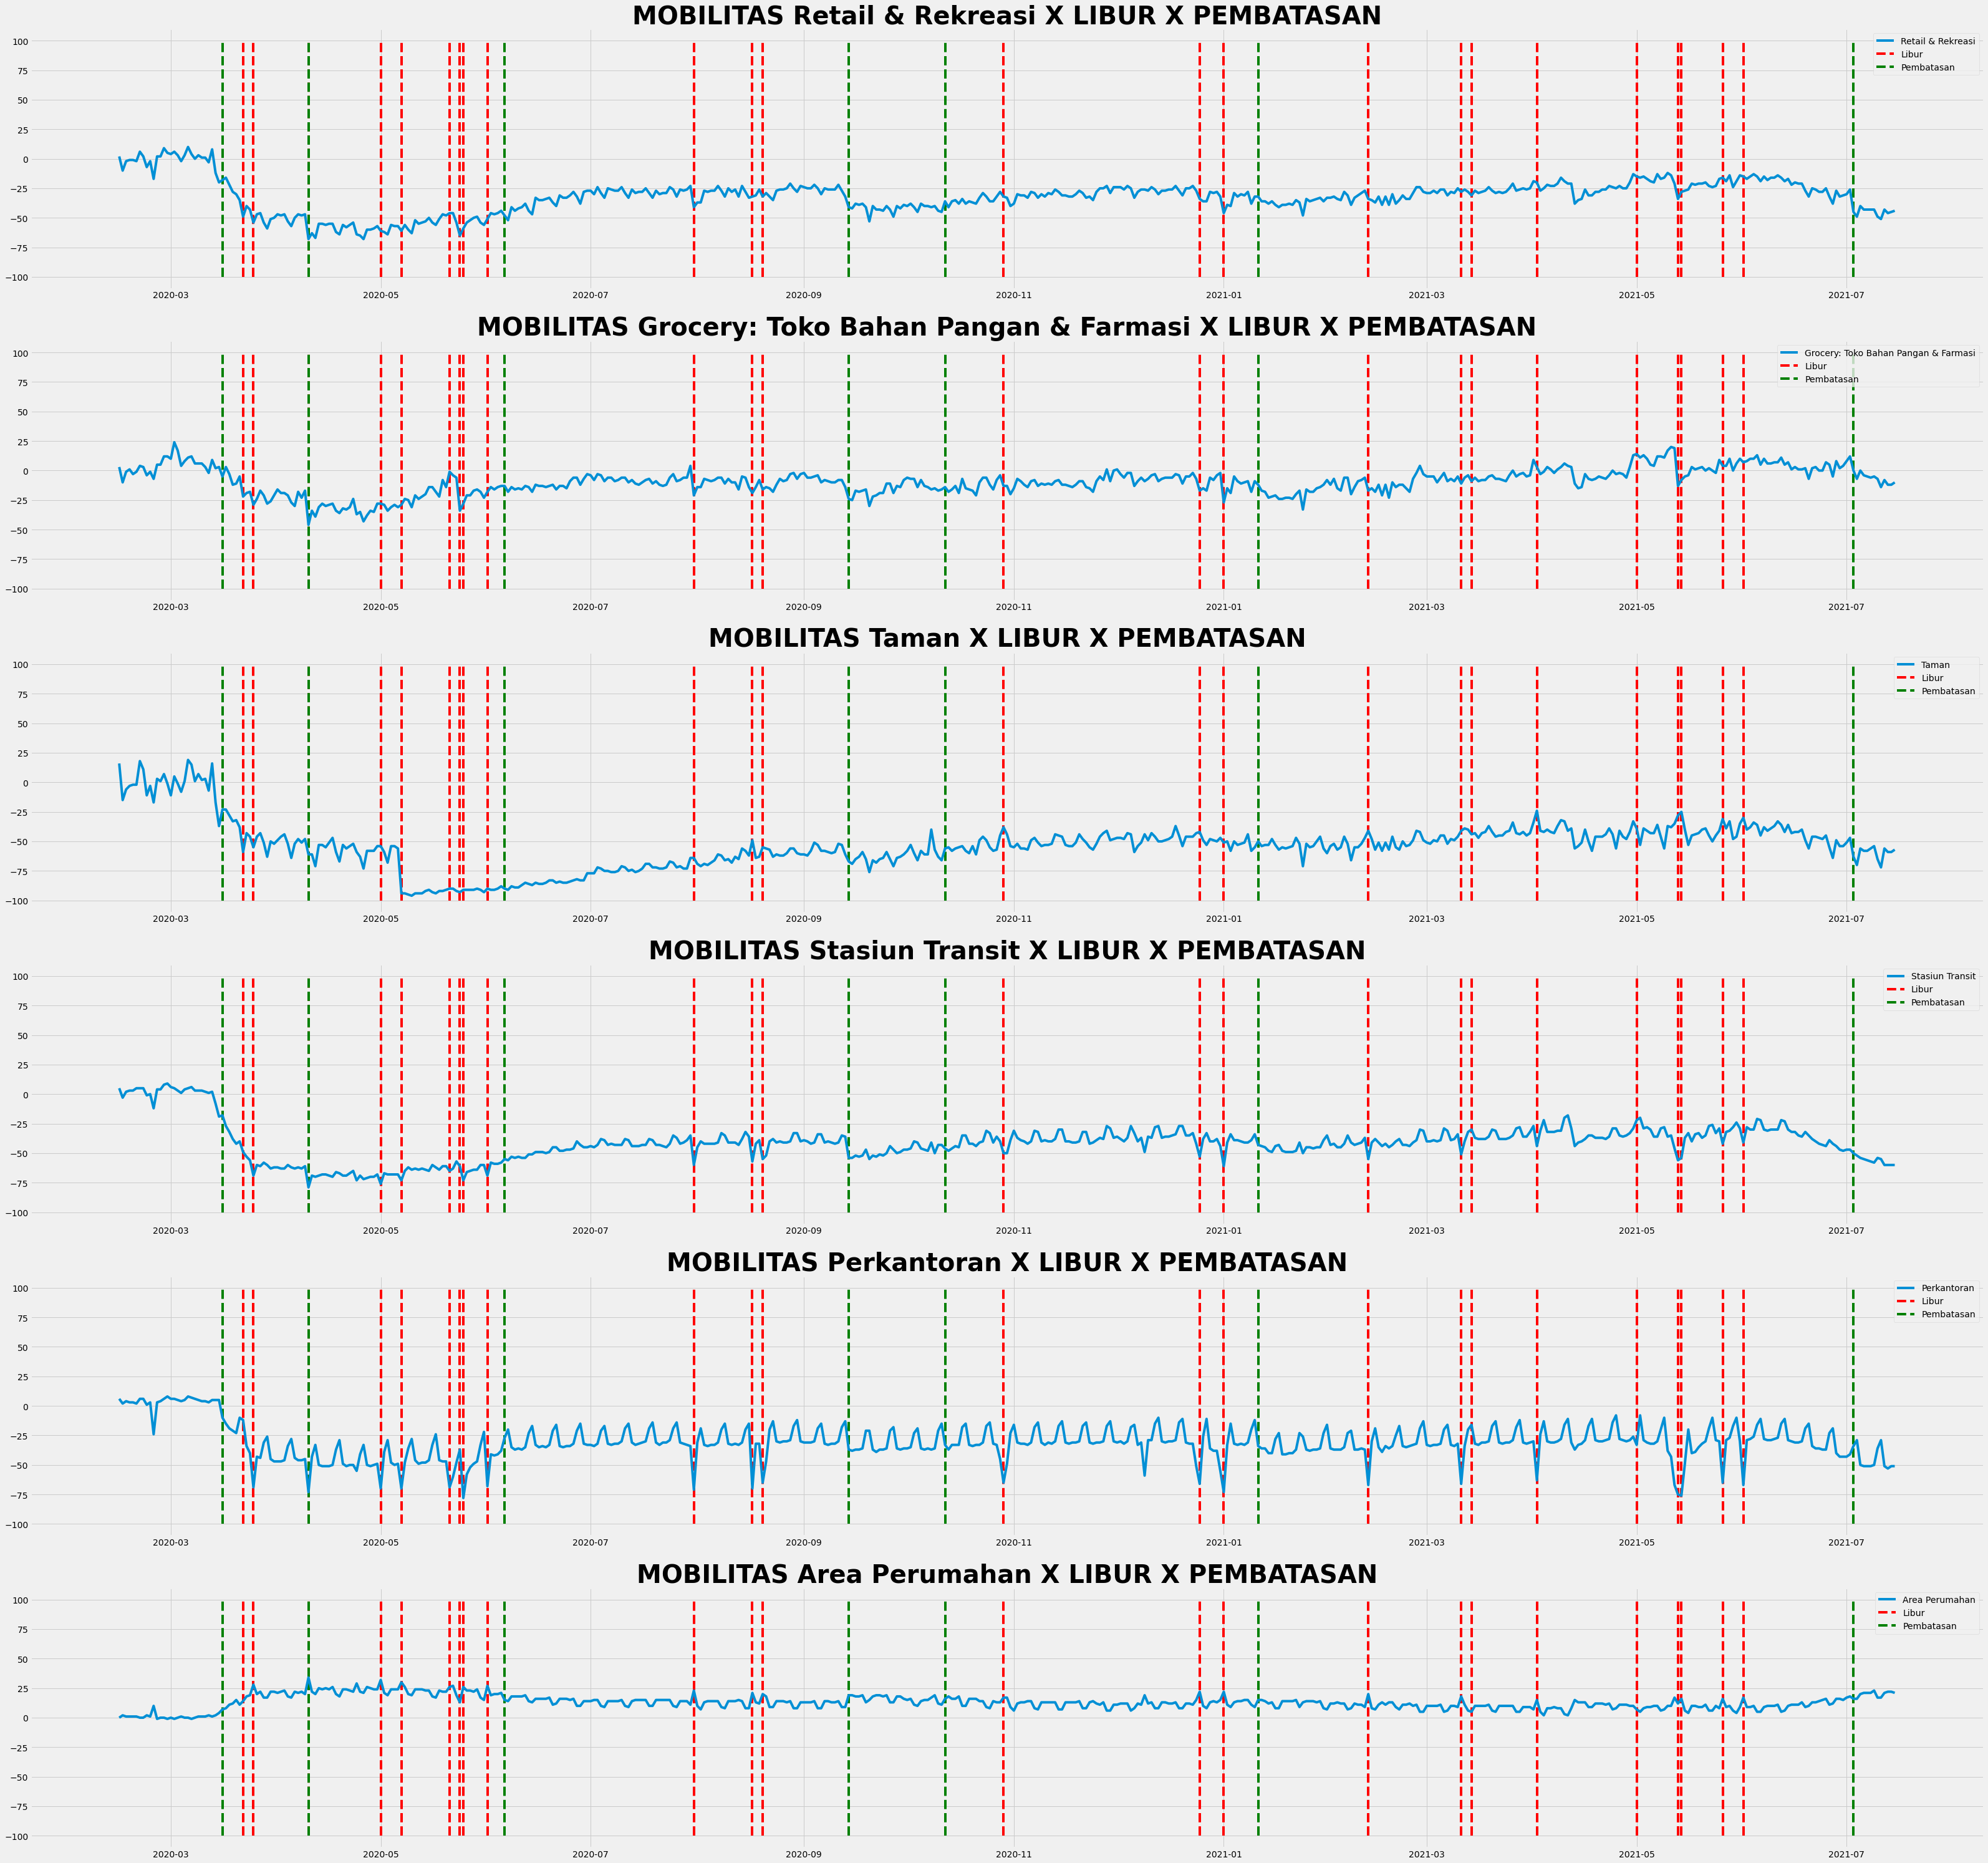

In [115]:
fig, ax = plt.subplots(figsize=(50,50), nrows=6)
for i, col in enumerate(mobility[['Retail & Rekreasi', 'Grocery: Toko Bahan Pangan & Farmasi',
       'Taman', 'Stasiun Transit', 'Perkantoran', 'Area Perumahan']]):
       ax[i].plot(mobility['date'], mobility[col], label=col)
       ax[i].vlines(dfLibur['Date'], ymax=100, ymin=-100, linestyles='dashed', colors='r', label='Libur')
       ax[i].vlines(pembatasan['Tanggal'], ymax=100, ymin=-100, linestyles='dashed', colors='g', label='Pembatasan')
       ax[i].legend()       
       ax[i].set_title(f'MOBILITAS {col} X LIBUR X PEMBATASAN', fontweight='bold', size=40)
plt.show()

[]

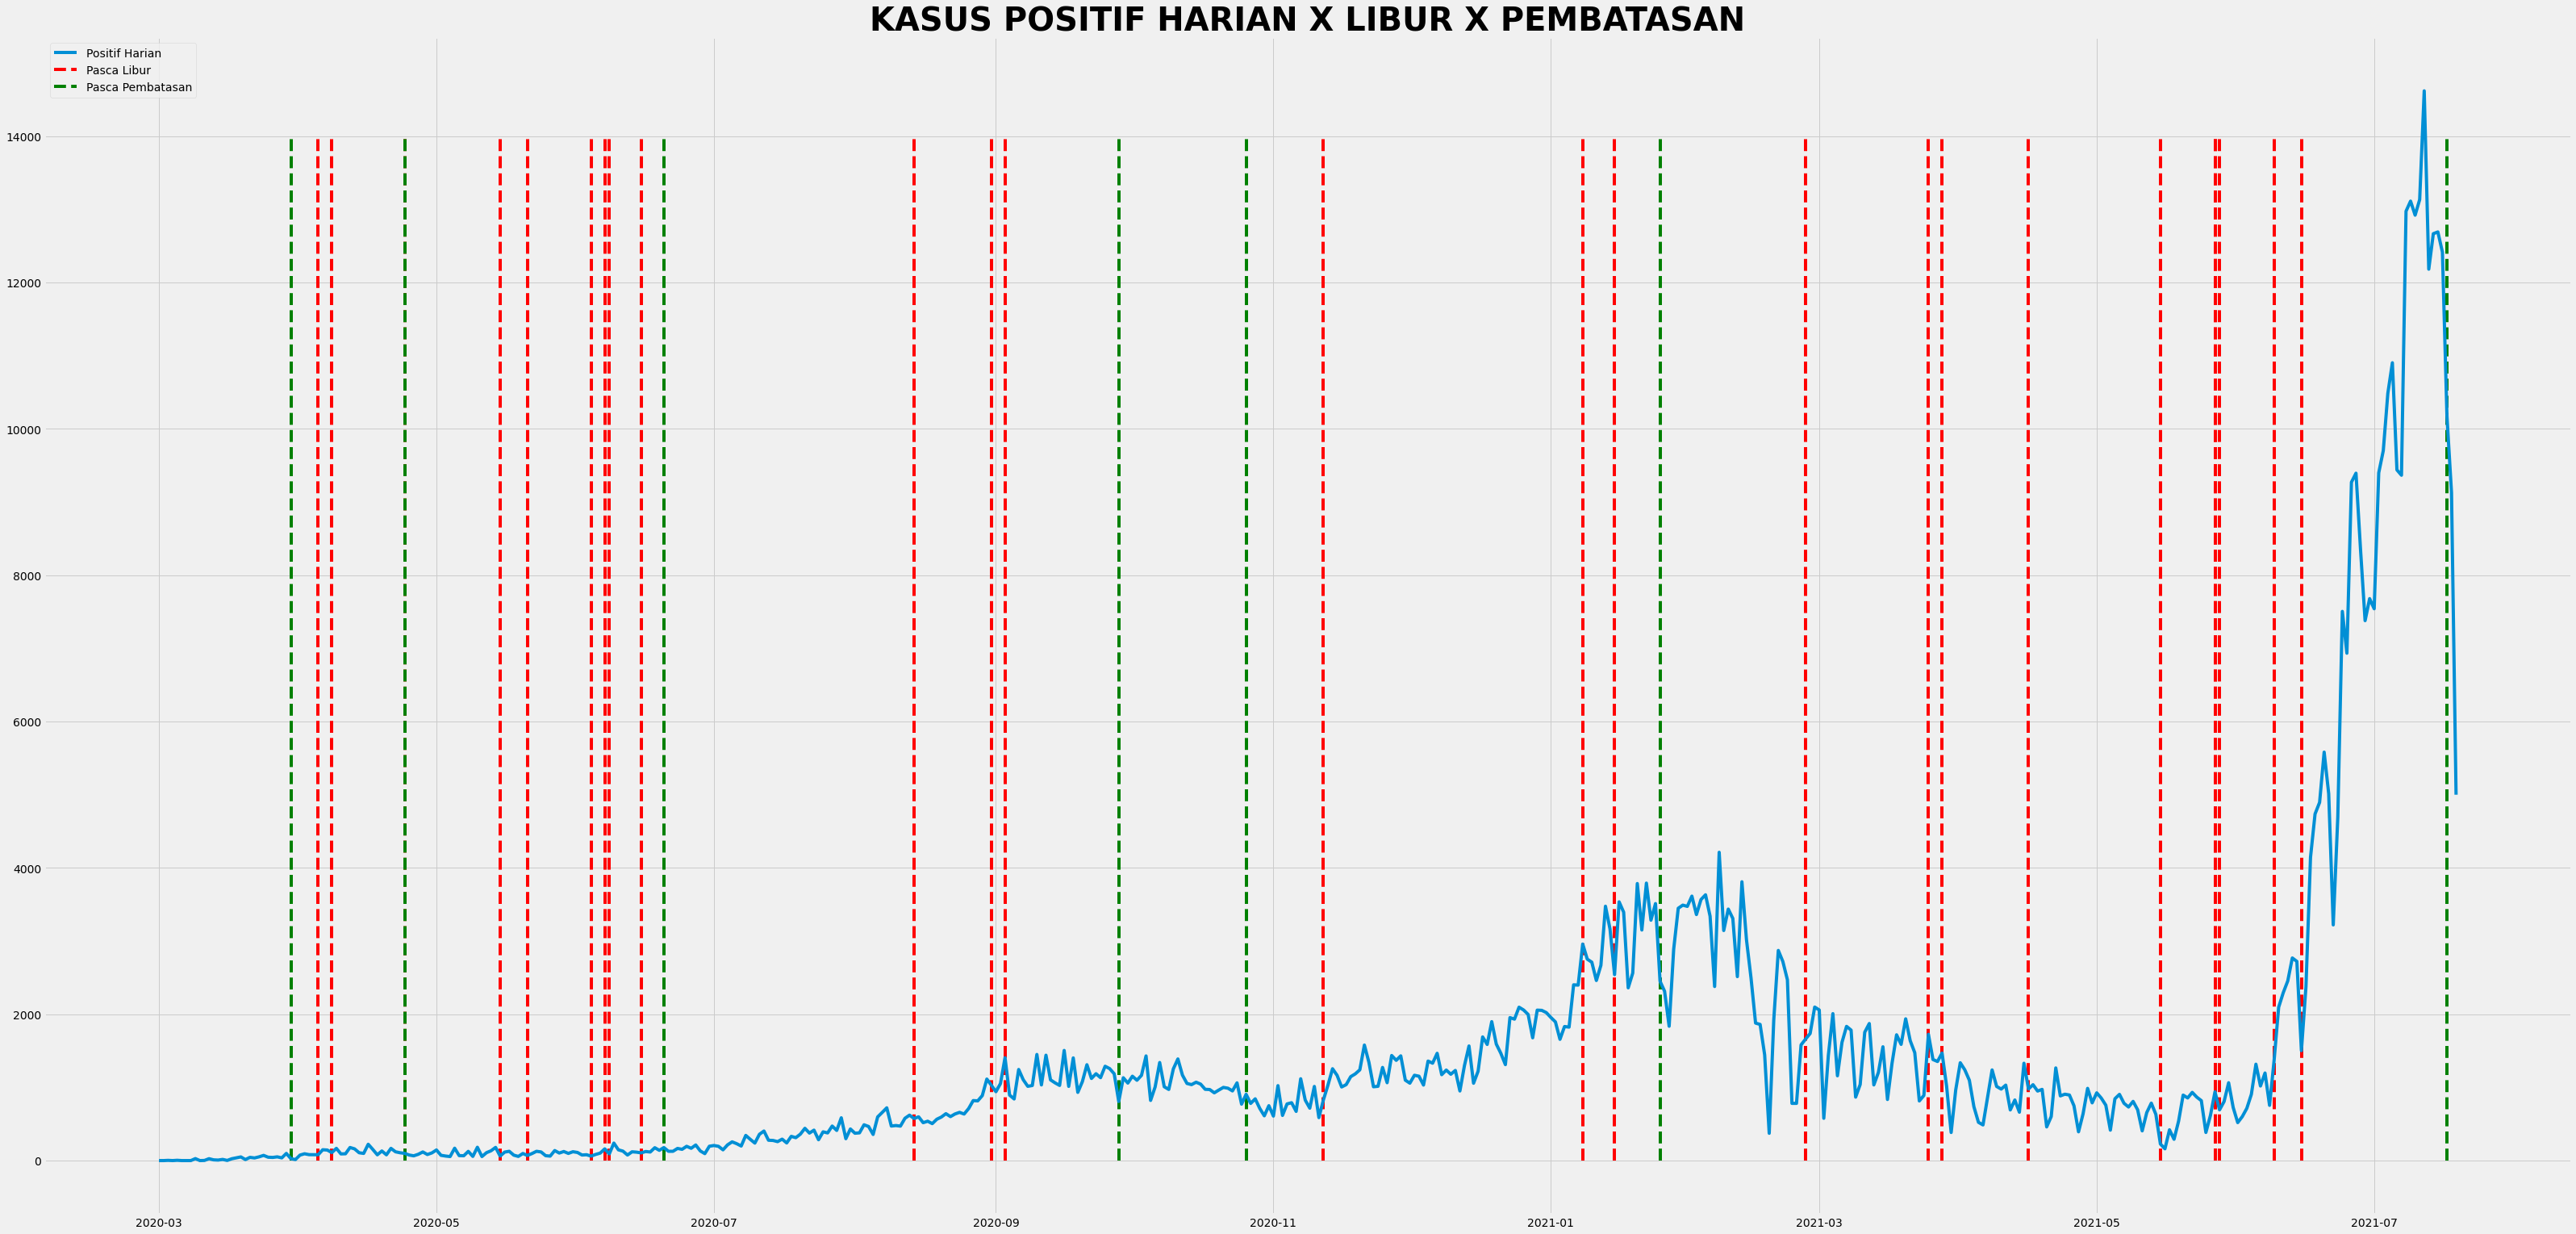

In [82]:
fig, ax = plt.subplots(figsize=(50,25))
ax.plot(df['Tanggal'], df['Positif Harian'], label='Positif Harian')
plt.vlines(pascaLibur['Date'], ymax=pascaLibur['dummy'], ymin=1, linestyles='dashed', colors='r', label='Pasca Libur')
plt.vlines(pascaPembatasan['Tanggal'], ymax=pascaLibur['dummy'], ymin=1, linestyles='dashed', colors='g', label='Pasca Pembatasan')
ax.legend()
ax.set_title('KASUS POSITIF HARIAN X LIBUR X PEMBATASAN', fontweight='bold', size=40)
plt.plot()

In [ ]:
#export data to process on tableau
dfLibur.to_csv('libur.csv', index=None)

vaksin.to_csv('vaksin.csv', index=None)
df.to_csv('positif.csv', index=None)
pascaLibur.to_csv('pascaLibur.csv', index=None)

In [ ]:
mobility.to_csv('jakartaMobility.csv', index=None)

In [ ]:
from datetime import datetime
days = datetime(day=14, month=9, year=2020)
days + timedelta(days=14)

datetime.datetime(2020, 9, 28, 0, 0)

# **f. Conclution and Recomendation**

Sampai saat ini angka kenaikan kasus positif Covid-19 masih terus bertambah setiap harinya bahkan semakin parah setelah masuknya varian delta. Meskipun vaksinasi sudah diberikan tetapi masih belum cukup untuk menekan angka kenaikan kasus positif Covid-19 yang ada. Hal yang harus dilakukan oleh warga negara Indonesia khususnya warga DKI Jakarta yang menyumbang 1/4 dari total keseluruhan angka kenaikan kasus positif Covid-19 adalah untuk melakukan Prosedur Kesehatan semaksimal mungkin, karena vaksinasi tidak menjamin seseorang kebal terhadap virus Korona.